<img src="TechLabs.png">

<h2>Please enter your full name here: Ralitsa Tsoneva</h2>


<p> This exam will test your knowledge in Data Science. </p>
<p> We will test the following: </p>
    
- Basic knowledge in Data Science
- How to manipulate data
- How to clean data
- Further data analysis

<h2>1. Basic Knowledge Test</h2>

A) Create a dictionary and a list.

In [1]:
my_dict = {}
my_list = []

B) Create your own array containing multiple lists (at least 5 rows and 4 columns).

In [2]:
import numpy as np
import pandas as pd

my_array = {'name': ['John', 'Ivan', 'Steve', 'Bill', 'Amanda'],
            'age': [34, 23, 56, 31, 29],
            'sex': ['M', 'M', 'M', 'M', 'F'],
            'status': ['married', 'single', 'divorced', 'married', 'married']}

my_array

{'age': [34, 23, 56, 31, 29],
 'name': ['John', 'Ivan', 'Steve', 'Bill', 'Amanda'],
 'sex': ['M', 'M', 'M', 'M', 'F'],
 'status': ['married', 'single', 'divorced', 'married', 'married']}

C) Convert your previous array into a pandas dataframe.

In [3]:
df = pd.DataFrame(data= my_array)
df

,name,age,sex,status
0,John,34,M,married
1,Ivan,23,M,single
2,Steve,56,M,divorced
3,Bill,31,M,married
4,Amanda,29,F,married


 D) Please write a function that will start with the number 2 and will add 3 as long as the number is under 25.

In [4]:
x = 2
def add_3_f():
  while (n < 25):
    n = n + 3
  return n

E) Briefly explain what a lambda function is and its benefits over using regular functions.

In [5]:
#Lambda refers to anonymous functions in programming.
#It allows you to write quick throw away functions without naming them. It also provides a nice way to write closures.

F) What is the difference between relational and non-relational databases?

In [6]:
# Relational databases also called SQL databases store data in a structured way, usually in tables that have logical connections which are visible in the database schema.
# Non-relational databases also called non-SQL store data in a non-structured way and in all types of formats. Its storage model is optimized for the type of data it's storing. 

<h2>2. Manipulating Data </h2>

Dataset used: "AB_NYC_2019.csv" </p>
In this part of the exam you will have to play around with a dataset and display subsets of the data.

In [7]:
# Place all packages you need here
import pandas as pd
import numpy as np

A) Load "AB_NYC_2019.csv",  drop all null values, and name it "df".

In [8]:
df = pd.read_csv('AB_NYC_2019.csv')
df.dropna(inplace= True)

B) Within the dataframe "df", permanently rename the column "name" to "listing_name".

In [9]:
df.rename(columns= {'name': 'listing_name'}, inplace= True)

In [10]:
df

,id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


C) Drop the column host_id. Save the new dataframe again under the name "df".

In [11]:
df.drop(columns= 'host_id', inplace= True)

In [12]:
df.head()

,id,listing_name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


D) Only show listings with a price higher than the average price. Sort the dataframe by price in an ascending order.

In [13]:
df.loc[df['price'] > df['price'].mean()].sort_values(['price'], axis = 0, ascending = True)


,id,listing_name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
16776,13395955,Adorable Prospect Heights 1 Bedroom,Nancy,Brooklyn,Prospect Heights,40.67649,-73.96697,Entire home/apt,143,31,3,2018-07-21,0.08,1,0
15285,12234139,1 Bedroom Outside Columbus Circle,Mckenzie,Manhattan,Upper West Side,40.77116,-73.98796,Entire home/apt,143,2,32,2019-04-22,0.81,1,0
15774,12755571,Studio in the heart of Manhattan,Nina,Manhattan,Midtown,40.75227,-73.97351,Entire home/apt,143,1,1,2016-05-13,0.03,1,0
37425,29699681,Sunny Penthouse with Williamsburg Bridge view,Laura,Brooklyn,Williamsburg,40.71093,-73.96407,Entire home/apt,143,5,2,2019-05-21,0.24,1,9
41791,32494256,Newly renovated 2 Bedroom Apartment,Victoria,Brooklyn,Clinton Hill,40.68771,-73.96304,Entire home/apt,143,2,22,2019-06-18,5.00,1,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
6530,4737930,Spanish Harlem Apt,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
9151,7003697,Furnished room in Astoria apartment,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0


E) Only show listings that have more than the average reviews and that are available for more than 10 nights (column "minimum_nights"). Sort the dataframe by reviews in a descending order.

In [14]:
df.loc[(df['number_of_reviews'] > df['number_of_reviews'].mean()) & (df['minimum_nights'] > 10)].sort_values(['number_of_reviews'], axis = 0, ascending = False)

,id,listing_name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
113,26785,Park Slope Green Guest House,Dani,Brooklyn,South Slope,40.66853,-73.98912,Entire home/apt,120,30,467,2018-12-30,4.22,2,192
3605,2154075,"Brooklyn Charm, Close to Manhattan (30+ Days O...",Joni,Brooklyn,Bedford-Stuyvesant,40.68640,-73.94529,Entire home/apt,112,200,314,2019-06-20,4.82,2,42
1242,531091,King size bedroom in 2 bed apartment,Dragan,Queens,Astoria,40.75532,-73.91603,Private room,109,30,304,2019-06-19,3.70,1,0
7984,6141401,Large Alcove Studio,Jon,Manhattan,Kips Bay,40.74257,-73.98207,Entire home/apt,225,30,276,2019-06-21,5.54,1,338
6375,4644632,"Brooklyn Life, Easy to Manhattan (30+ Days only)",Joni,Brooklyn,Bedford-Stuyvesant,40.68797,-73.94696,Entire home/apt,130,200,271,2019-07-03,4.84,2,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,949713,Luxury Duplex Loft w. Private Roof & Amazing V...,Tal,Brooklyn,Gowanus,40.67450,-73.99582,Entire home/apt,400,30,30,2019-06-01,0.39,1,67
496,174966,Luxury 2Bed/2.5Bath Central Park View,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
296,68735,Prewar Penthouse w Private Terrace,Violetta,Manhattan,Upper West Side,40.78971,-73.97290,Entire home/apt,195,11,30,2019-06-13,0.32,1,249
10746,8270710,Gorgeous sunny apt steps to park!,Eric And Aoife,Brooklyn,Windsor Terrace,40.65106,-73.97704,Entire home/apt,99,20,30,2017-06-11,0.65,2,65


F) Display the number of listings per neighbourhood and only display those neighbourhoods with more than 1000 listings.

In [15]:
#df_by_neighbourhood = df.groupby(by= 'neighbourhood').count()
#df_by_neighbourhood = df_by_neighbourhood['id']
#df_by_neighbourhood.reset_index()
#df_by_neighbourhood.rename(columns={'id': 'count_id'}, inplace= True)


In [16]:
grouped_df = df.groupby(by = 'neighbourhood').count()
grouped_df = grouped_df[['id']]

grouped_df.loc[grouped_df['id'] > 1000]

,id
neighbourhood,
Bedford-Stuyvesant,3141
Bushwick,1942
Crown Heights,1265
East Village,1489
Harlem,2204
Hell's Kitchen,1528
Upper East Side,1405
Upper West Side,1482
Williamsburg,3163


G) Display the number of the different types of rooms (column "room_type") per neighbourhood.

In [17]:
grouped_multiple = df.groupby(['neighbourhood', 'room_type'], as_index= False)

grouped_multiple

H) Replace the values within "room_type" with numerical values, i.e. 0 for "private room", 1 for "Entire home/apt", and 2 for "Shared room". </p>
Save the new dataframe again under the name "df".

In [18]:
df.loc[df['room_type'] == 'Private room', 'room_type'] = 0
df.loc[df['room_type'] == 'Entire home/apt', 'room_type'] = 1
df.loc[df['room_type'] == 'Shared room', 'room_type'] = 2

df['room_type'].unique()

array([0, 1, 2], dtype=object)

I) Display a bar chart using the distplot (from the seaborn library) that shows the neighbourhood on the x-axis and the number of listings on the y-axis.

In [19]:
grouped_df.reset_index()


,neighbourhood,id
0,Allerton,37
1,Arden Heights,4
2,Arrochar,20
3,Arverne,66
4,Astoria,709
...,...,...
213,Willowbrook,1
214,Windsor Terrace,128
215,Woodhaven,72
216,Woodlawn,11


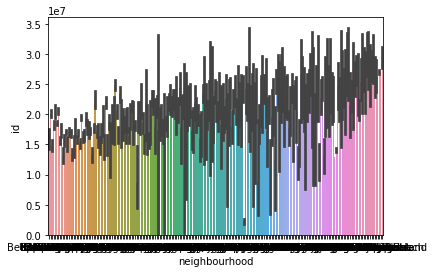

In [20]:
import seaborn as sns
sns.barplot(data=grouped_df, x=df["neighbourhood"], y=df["id"])

J) Scale the column "price" and the column "number_of_reviews" using a method that seems appropriate in your opinion. </p>
Save the new dataframe again under the name "df".

In [21]:
from sklearn import preprocessing

x = df[['price', 'number_of_reviews']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_new = pd.DataFrame(x_scaled)

df_new.rename(columns = {0: 'price_scaled', 1: 'number_of_reviews_scaled'}, inplace= True)

df = df.join(df_new)


In [22]:
df

,id,listing_name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_scaled,number_of_reviews_scaled
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,0,149,1,9,2018-10-19,0.21,6,365,0.0149,0.012739
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,1,225,1,45,2019-05-21,0.38,2,355,0.0225,0.070064
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,1,89,1,270,2019-07-05,4.64,1,194,0.0080,0.012739
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,1,80,10,9,2018-11-19,0.10,1,0,0.0200,0.116242
5,5099,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,1,200,3,74,2019-06-22,0.59,1,129,0.0060,0.076433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,0,129,1,1,2019-07-07,1.00,1,147,NaN,NaN
48790,36427429,No.2 with queen size bed,H Ai,Queens,Flushing,40.75104,-73.81459,0,45,1,1,2019-07-07,1.00,6,339,NaN,NaN
48799,36438336,Seas The Moment,Ben,Staten Island,Great Kills,40.54179,-74.14275,0,235,1,1,2019-07-07,1.00,1,87,NaN,NaN
48805,36442252,1B-1B apartment near by Metro,Blaine,Bronx,Mott Haven,40.80787,-73.92400,1,100,1,2,2019-07-07,2.00,1,40,NaN,NaN


<h2>3. Cleaning Data</h2>

Dataset used: "defaults.xls"

In [23]:
# Place all packages you need here


A) Load the dataset "defaults.xls" and save it under the name "defaults". Display the datatypes of all columns of the dataset "defaults.xls".

In [24]:
defaults = pd.read_excel('defaults.xls')
defaults.dtypes

ID               int64
CREDIT_LIMIT     int64
SEX             object
EDUCATION       object
MARRIAGE        object
AGE              int64
default          int64
dtype: object

In [25]:
defaults.head()

,ID,CREDIT_LIMIT,SEX,EDUCATION,MARRIAGE,AGE,default
0,1,20000,female,university,married,24,1
1,2,120000,female,university,single,26,1
2,3,90000,female,university,single,34,0
3,4,50000,female,university,married,37,0
4,5,50000,male,university,married,57,0


B) Some column(s) might not be needed. Get rid of them. Explain why you get rid of the respective column(s). </p>
Save the new dataframe again under the name "defaults".

In [26]:
# I will only get rid of the 'ID' column as it is not adding any value to the analysis, high cardinality (all values are diff)

defaults.drop(columns = 'ID', inplace= True)
defaults

,CREDIT_LIMIT,SEX,EDUCATION,MARRIAGE,AGE,default
0,20000,female,university,married,24,1
1,120000,female,university,single,26,1
2,90000,female,university,single,34,0
3,50000,female,university,married,37,0
4,50000,male,university,married,57,0
...,...,...,...,...,...,...
29596,220000,male,high school,married,39,0
29597,150000,male,high school,single,43,0
29598,30000,male,university,single,37,1
29599,80000,male,high school,married,41,1


C) Convert all categorical values into dummy variables. Only include columns with valuable information. </p>
Save the new dataframe again under the name "defaults".

In [27]:
dummy = pd.get_dummies(defaults[['SEX', 'EDUCATION', 'MARRIAGE']])
dummy.head()

,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,0,0,0,0,1,1,0,0
1,1,0,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,1,0,0
4,0,1,0,0,0,1,1,0,0


In [28]:
defaults = pd.concat([defaults, dummy], axis = 1 )
defaults.head()

,CREDIT_LIMIT,SEX,EDUCATION,MARRIAGE,AGE,default,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,20000,female,university,married,24,1,1,0,0,0,0,1,1,0,0
1,120000,female,university,single,26,1,1,0,0,0,0,1,0,0,1
2,90000,female,university,single,34,0,1,0,0,0,0,1,0,0,1
3,50000,female,university,married,37,0,1,0,0,0,0,1,1,0,0
4,50000,male,university,married,57,0,0,1,0,0,0,1,1,0,0


In [29]:
defaults.columns

Index(['CREDIT_LIMIT', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default',
       'SEX_female', 'SEX_male', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single'],
      dtype='object')

D) In order to run a model, we have to define now the X and y variables. Set the y values to the "default" (either 0 or 1). The remaining columns represent the X values.

In [31]:
y = defaults['default']
X = defaults[['CREDIT_LIMIT', 'AGE',
       'SEX_female', 'SEX_male', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single']]

<h2>4. Further Data Analysis</h2>

A) Please evaluate the importance of each feature of the X values on the y value of the previous exercise using any tree ensamble algorithm and display the results graphically. Please comment your findings. Please tell us what you did and why you did it.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5,  max_depth=10, random_state=0)
m0 = gb_clf.fit(X, y)

In [38]:
feature_importance = m0.feature_importances_
feature_importance

array([0.35908798, 0.32697731, 0.04868228, 0.0490784 , 0.03974727,
       0.0439546 , 0.00351232, 0.04041616, 0.03681396, 0.01109305,
       0.04063669])

In [39]:
features_names = ['CREDIT_LIMIT', 'AGE',
       'SEX_female', 'SEX_male', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single']

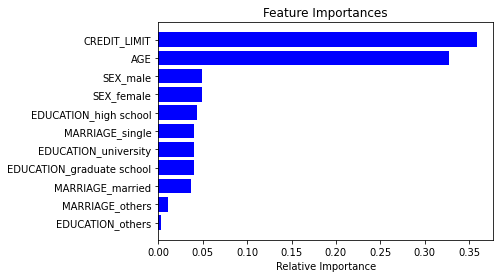

In [42]:
from matplotlib import pyplot as plt

indices = np.argsort(feature_importance)

plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**We can see that the two most improtant features are "Credit Limit" and "Age". The importance these features have is more or less one that can define the target variable. We can say that we have only 2 informative features while the rest are simply not. Therefore, we can try and run another model only with these two features are predictors and see the performance. Most probably the model will perform the same as when we have all other features included as well. **

B) Please assess how accuarely we can predict, whether a customer will default or not using Support Vector Machines. As always plase explain your work.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.svm import SVC

svm_clf = SVC()
svm_clf = svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
acc

0.7708056095813287

C) Now let's see how accurate the XGBoost algorithm can predict, whether a customer will default or not better than the previous SVM. Please give us the accuracy score and standard deviation. Choose an appropiate model for testing and training.

In [51]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)
pred_xgb = xgb_clf.predict(X_test)

acc_xgb = accuracy_score(y_test, pred_xgb)
acc_xgb

0.770907974204115